# Performance Prediction Challenge

In [ ]:
import pandas as pd
import numpy as np 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
data_train=pd.DataFrame(np.loadtxt('/content/drive/My Drive/ada_train.data'))
data_test=pd.DataFrame(np.loadtxt('/content/drive/My Drive/ada_test.data'))
labels_train=pd.DataFrame(np.loadtxt('/content/drive/My Drive/ada_train.labels'))
data_valid=pd.DataFrame(np.loadtxt('/content/drive/My Drive/ada_valid.data'))
labels_valid=pd.DataFrame(np.loadtxt('/content/drive/My Drive/ada_valid.labels'))

# 1. Exploratory data analysis #

In [ ]:
data_train.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,0.0,1.0,1.0,32.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,812.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,133.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,437.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,189.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,109.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,812.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,455.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,113.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,812.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,400.0,0.0,0.0,0.0,0.0,0.0,1.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,120.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,562.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,233.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,303.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_train.shape

(4147, 48)

We have 49 features, all numerical values.  
The training set contains 4147 examples.  
We see that the last column has missing values. Let's see how many missing values each column has.

In [ ]:
# we are reshaping it just to make the output more aesthetical (otherwise it would look like a long column that one has to scroll through)
data_train.isnull().sum().values.reshape(1,-1)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]])

Let's run some descriptive statistics on our data.

In [ ]:
data_train.describe() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
count,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.0,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.0,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.00000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000
mean,0.008922,0.028937,0.120569,126.408006,0.104895,0.028454,0.140825,0.860140,0.134314,20.033036,0.046057,0.020014,0.127562,0.0,631.886665,0.673499,0.065831,0.046057,0.742223,0.030383,0.0,0.121293,0.043164,0.090668,429.348686,0.028937,0.32409,0.071136,0.030625,0.140342,0.411382,10.964070,0.104172,0.049674,0.036171,0.038341,0.012780,0.009646,0.004823,411.804196,0.266458,0.106824,0.000482,0.463950,0.073065,0.140825,0.000241,0.029901
std,0.094046,0.167649,0.325665,69.754074,0.306455,0.166287,0.347883,0.346884,0.341030,91.933304,0.209635,0.140066,0.333642,0.0,161.410107,0.468990,0.248016,0.209635,0.437463,0.171661,0.0,0.326506,0.203250,0.287171,146.029831,0.167649,0.46809,0.257082,0.172319,0.347384,0.492143,76.318757,0.305520,0.217298,0.186737,0.192041,0.112339,0.097749,0.069287,119.999993,0.442160,0.308927,0.021958,0.498759,0.260274,0.347883,0.015529,0.170335
min,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,189.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,78.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,562.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,311.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,404.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,119.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,624.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,411.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,404.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,160.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,812.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,522.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,454.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,995.000000,1.000000,1.000000,1.000000,1.000000,1.000000,648.000000,1.000000,1.000000,1.000000,0.0,999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,999.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Most of our features have values between 0 and 1.   
Only 6 of them have values up to 1000.

In [ ]:
data_train.max().values.reshape(1,-1)

array([[  1.,   1.,   1., 995.,   1.,   1.,   1.,   1.,   1., 648.,   1.,
          1.,   1.,   0., 999.,   1.,   1.,   1.,   1.,   1.,   0.,   1.,
          1.,   1., 999.,   1.,   1.,   1.,   1.,   1.,   1., 999.,   1.,
          1.,   1.,   1.,   1.,   1.,   1., 999.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.]])

By the look of the descriptive statistics above, it looks like some of the features might be binary. Let's count the **unique values per column**.

In [ ]:
data_train.nunique().values.reshape(1,-1)

array([[  2,   2,   2, 330,   2,   2,   2,   2,   2,  48,   2,   2,   2,
          1,  16,   2,   2,   2,   2,   2,   1,   2,   2,   2,  69,   2,
          2,   2,   2,   2,   2,  51,   2,   2,   2,   2,   2,   2,   2,
         75,   2,   2,   2,   2,   2,   2,   2,   2]])

Indeed, the most of our features are binary, as suspected.  
Let's get the indexes for those columns.

In [ ]:
not_binary_columns = data_train.columns[data_train.nunique()>2].values
print(not_binary_columns)

[ 3  9 14 24 31 39]


There are also two columns with a single value.  

In [ ]:
one_val_columns = data_train.columns[data_train.nunique()==1].values
print(one_val_columns)

[13 20]


Let's have a look at histograms to see the distribution of each features.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f060c466710>,
      dtype=object)

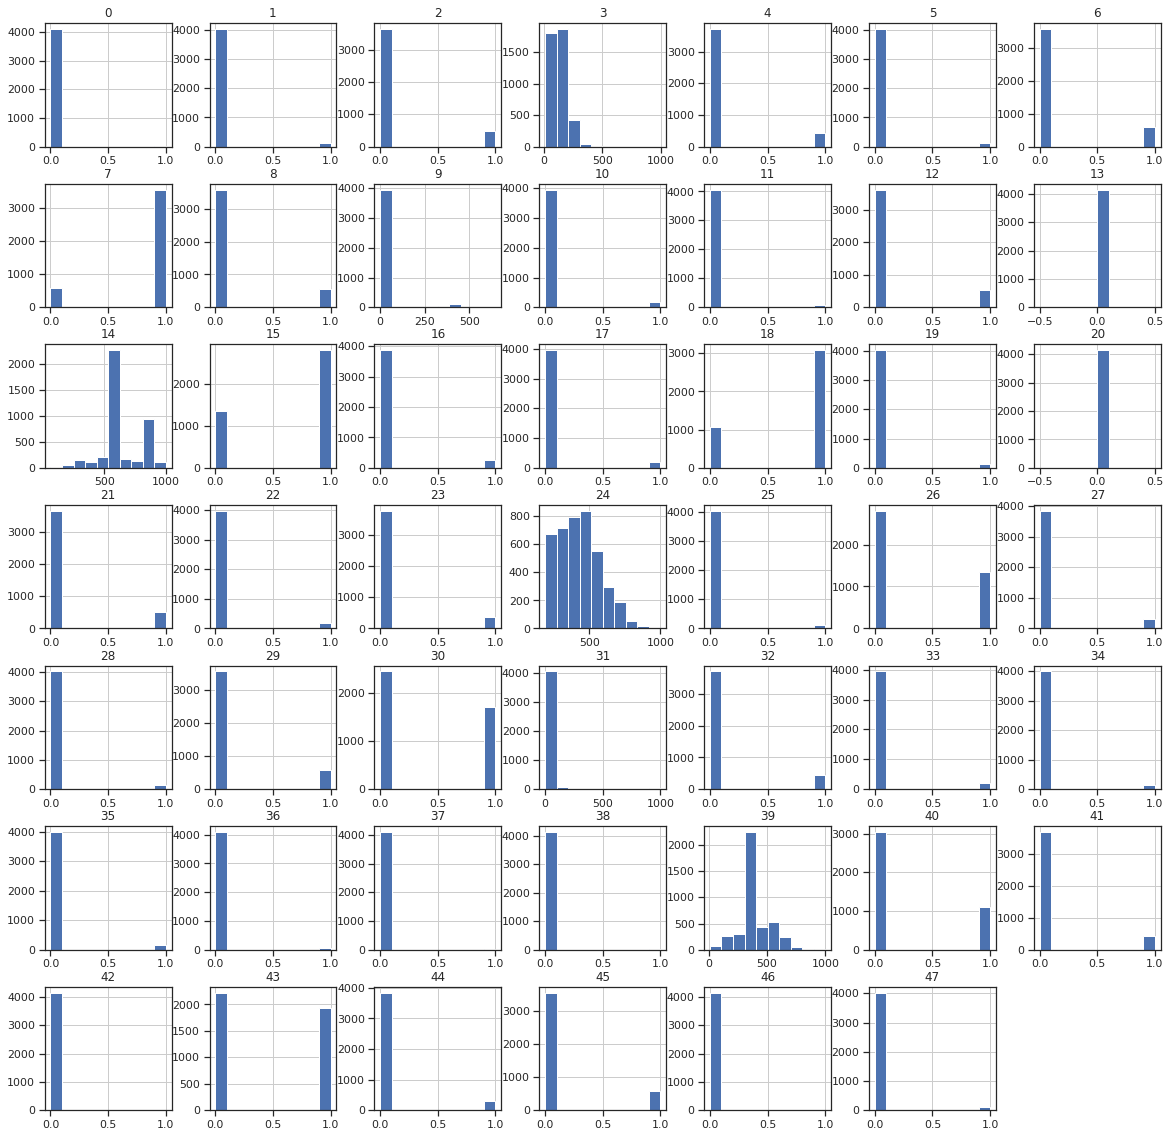

In [ ]:
data_train.hist(figsize=(20,20))

Let's have a look at histograms to see the distribution of each features with the max value >1.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06099229b0>,
      dtype=object)

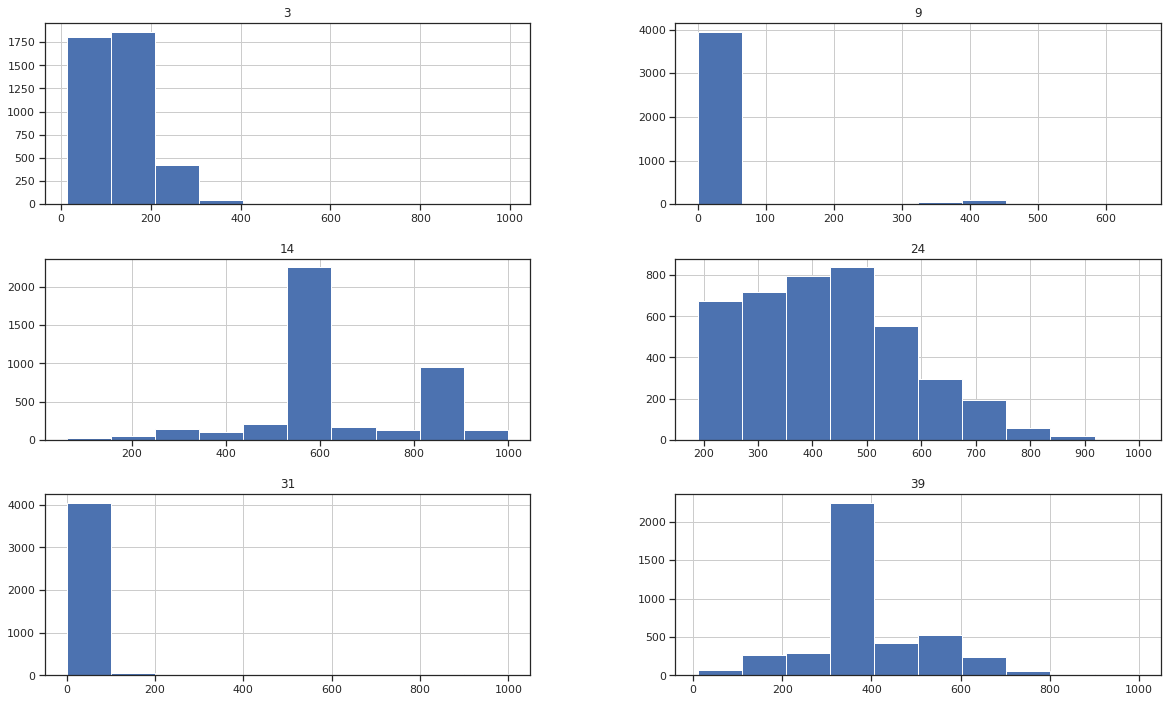

In [ ]:
max_values=(data_train.max()).tolist()
max=pd.DataFrame()
for i in range(len(data_train.columns)):
    if(max_values[i]>1):
        a=data_train[[i]]
        max=pd.concat([max,a],axis=1)
max.hist(figsize=(20,12))

Let's see them as boxplots, so we can get a better feel of the outliers.

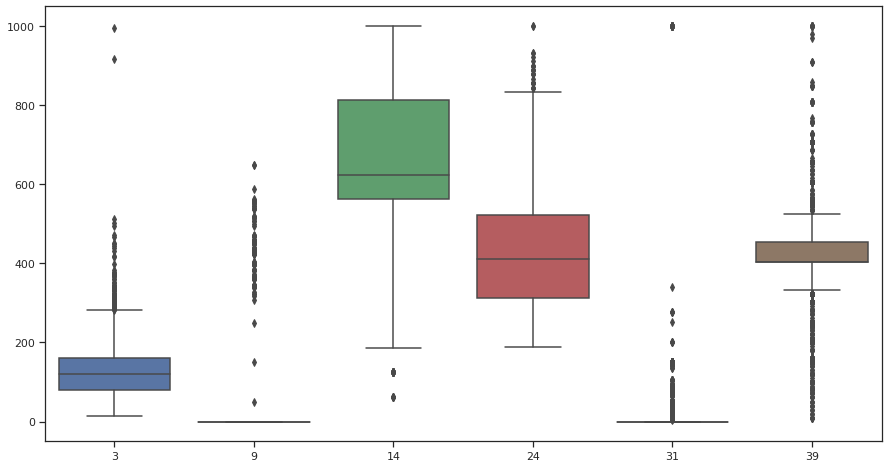

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=max)

Observations:  
1. There are too many outliers in columns 3, 14, 24 and 39  
2. Columns 9 and 31 have almost only 0 values

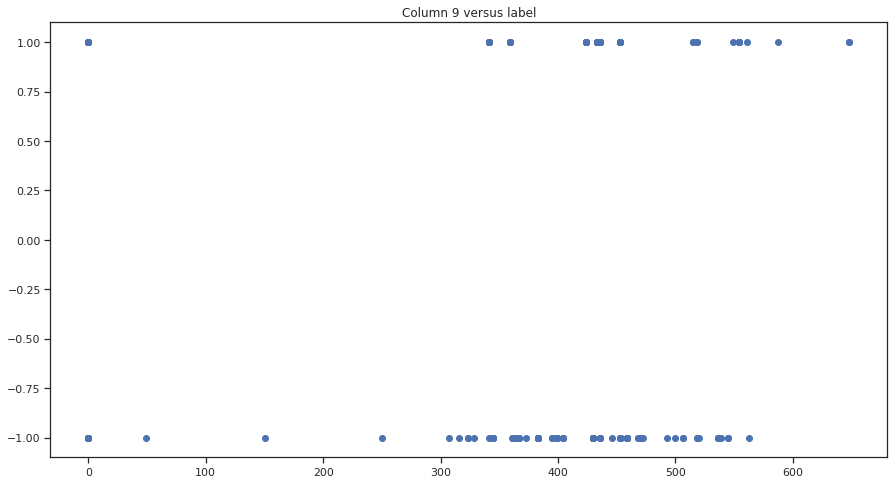

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Column 9 versus label')
plt.scatter(data_train[9],labels_train)

<BarContainer object of 2 artists>

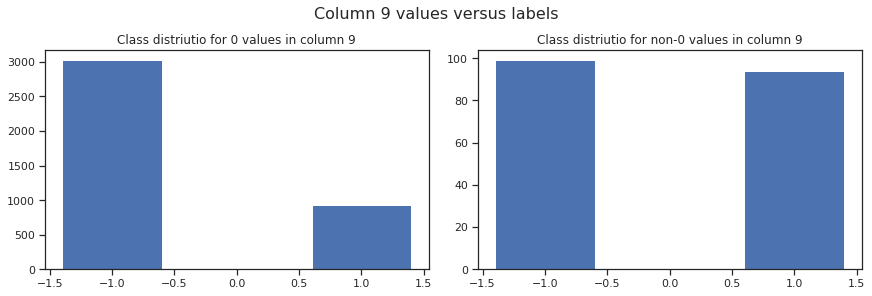

In [ ]:
fig, axs = plt.subplots(1, 2, constrained_layout=True)
fig.suptitle('Column 9 values versus labels', fontsize=16)
fig.set_figheight(4)
fig.set_figwidth(12)

axs[0].set_title('Class distriutio for 0 values in column 9')
axs[0].bar([-1,1],labels_train[data_train[9]==0].value_counts().values)

axs[1].set_title('Class distriutio for non-0 values in column 9')
axs[1].bar([-1,1],labels_train[data_train[9]>0].value_counts().values)

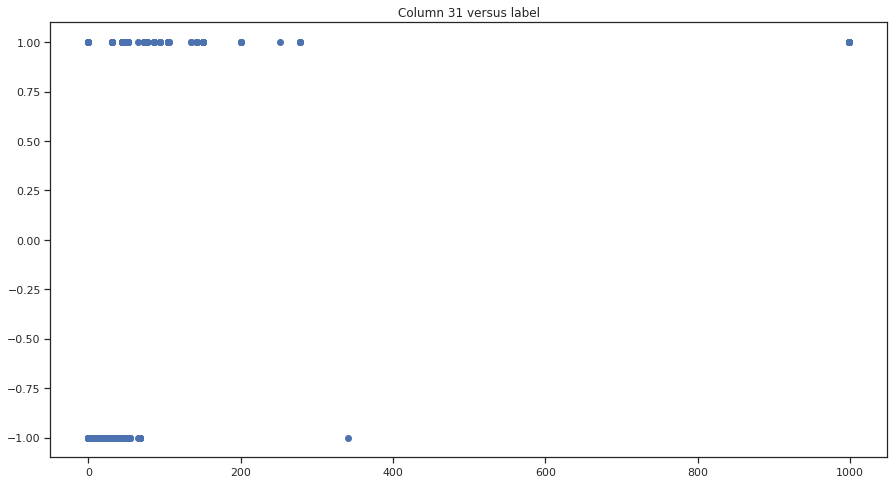

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Column 31 versus label')
plt.scatter(data_train[31],labels_train)

<BarContainer object of 2 artists>

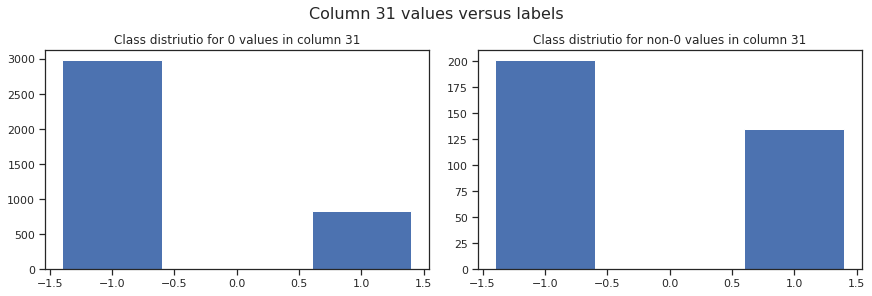

In [ ]:
fig, axs = plt.subplots(1, 2, constrained_layout=True)
fig.suptitle('Column 31 values versus labels', fontsize=16)
fig.set_figheight(4)
fig.set_figwidth(12)

axs[0].set_title('Class distriutio for 0 values in column 31')
axs[0].bar([-1,1],labels_train[data_train[31]==0].value_counts().values)

axs[1].set_title('Class distriutio for non-0 values in column 31')
axs[1].bar([-1,1],labels_train[data_train[31]>0].value_counts().values)

Distribution of classes in our training set  

3000 class -1  
1000 class 1   

<BarContainer object of 2 artists>

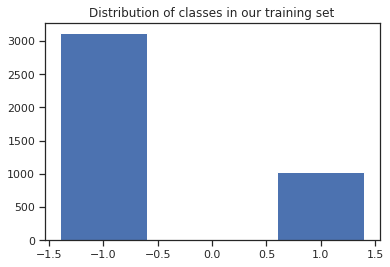

In [ ]:
plt.title('Distribution of classes in our training set')
plt.bar([-1, 1], labels_train.value_counts())

### Clustering Analysis - Outliers detection

In [ ]:
from sklearn.cluster import DBSCAN  
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 

In [ ]:
!wget -O ADA.zip http://clopinet.com/isabelle/Projects/modelselect/datasets/ADA.zip

--2020-11-09 15:20:09--  http://clopinet.com/isabelle/Projects/modelselect/datasets/ADA.zip
Resolving clopinet.com (clopinet.com)... 66.96.146.129
Connecting to clopinet.com (clopinet.com)|66.96.146.129|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 594310 (580K) [application/zip]
Saving to: ‘ADA.zip’

ADA.zip             100%[===================>] 580.38K   924KB/s    in 0.6s    

2020-11-09 15:20:10 (924 KB/s) - ‘ADA.zip’ saved [594310/594310]



In [ ]:
!rm -r ADA
!unzip ADA.zip

Archive:  ADA.zip
  inflating: ADA/ada.param           
  inflating: ADA/ada_test.data       
  inflating: ADA/ada_train.data      
  inflating: ADA/ada_train.labels    
  inflating: ADA/ada_valid.data      
  inflating: ADA/ada_valid.labels    


In [ ]:
ada_train_labels = pd.DataFrame(pd.read_table("ADA/ada_train.labels").values)
ada_valid_labels = pd.DataFrame(pd.read_table("ADA/ada_valid.labels").values)
ada_train_labels.head()

,0
0,-1
1,-1
2,1
3,-1
4,1


In [ ]:
ada_train_labels.shape

(4146, 1)

In [ ]:
ada_train = pd.DataFrame(pd.read_table("ADA/ada_train.data", sep=" ", ).values)
ada_valid = pd.DataFrame(pd.read_table("ADA/ada_valid.data", sep=" ", ).values)
ada_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,0.0,0.0,1.0,133.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,437.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,189.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,109.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,812.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,455.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,113.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,812.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,400.0,0.0,0.0,0.0,0.0,0.0,1.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN
3,0.0,0.0,0.0,120.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,562.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,233.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,303.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,121.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,624.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,444.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN


In [ ]:
ada_train.shape

(4146, 49)

In [ ]:
ada_train = ada_train.drop(48, axis=1)
ada_valid = ada_valid.drop(48, axis=1)

In [ ]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(ada_train)
labels = db.labels_
labels

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([False, False, False, ..., False, False, False])

In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

0

In [ ]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1}

In [ ]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

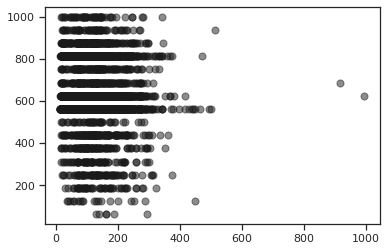

In [ ]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = ada_train[class_member_mask & core_samples_mask]
    plt.scatter(xy.values[:, 3], xy.values[:, 14],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = ada_train[class_member_mask & ~core_samples_mask]
    plt.scatter(xy.values[:, 3], xy.values[:, 14],s=50, c=[col], marker=u'o', alpha=0.5)

In [ ]:
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 

In [ ]:
agglom = AgglomerativeClustering(n_clusters = 2, linkage = 'average')

In [ ]:
agglom.fit(ada_train.values, ada_train_labels.values)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2)

In [ ]:
dist_matrix = distance_matrix(ada_train.values, ada_train.values) 
print(dist_matrix)

[[  0.         488.06556937 463.14468582 ... 176.04828883 221.576172
  506.24302464]
 [488.06556937   0.          75.83534796 ... 331.70318057 329.07445966
  259.24891514]
 [463.14468582  75.83534796   0.         ... 303.98355219 297.80698447
  303.02310143]
 ...
 [176.04828883 331.70318057 303.98355219 ...   0.         125.25573839
  395.2581435 ]
 [221.576172   329.07445966 297.80698447 ... 125.25573839   0.
  439.96818067]
 [506.24302464 259.24891514 303.02310143 ... 395.2581435  439.96818067
    0.        ]]


In [ ]:
Z = hierarchy.linkage(dist_matrix, 'complete')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


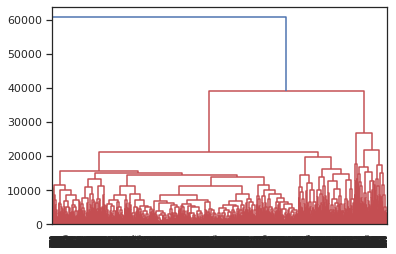

In [ ]:
#dendro = hierarchy.dendrogram(Z)

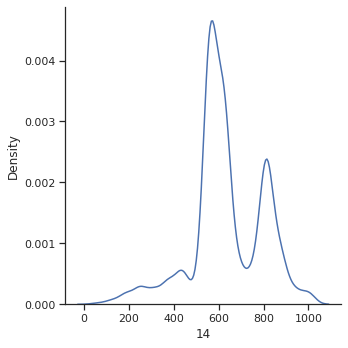

In [ ]:
sns.displot(ada_train[14], kind="kde")

In [ ]:
not_binary_columns = ada_train.columns[ada_train.nunique()>2].values
print(not_binary_columns)

[ 3  9 14 24 31 39]


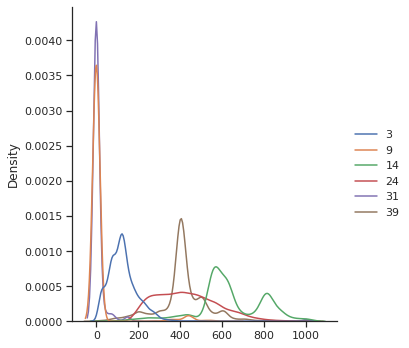

In [ ]:
sns.displot(ada_train[[3, 9, 14, 24, 31, 39]], kind="kde")

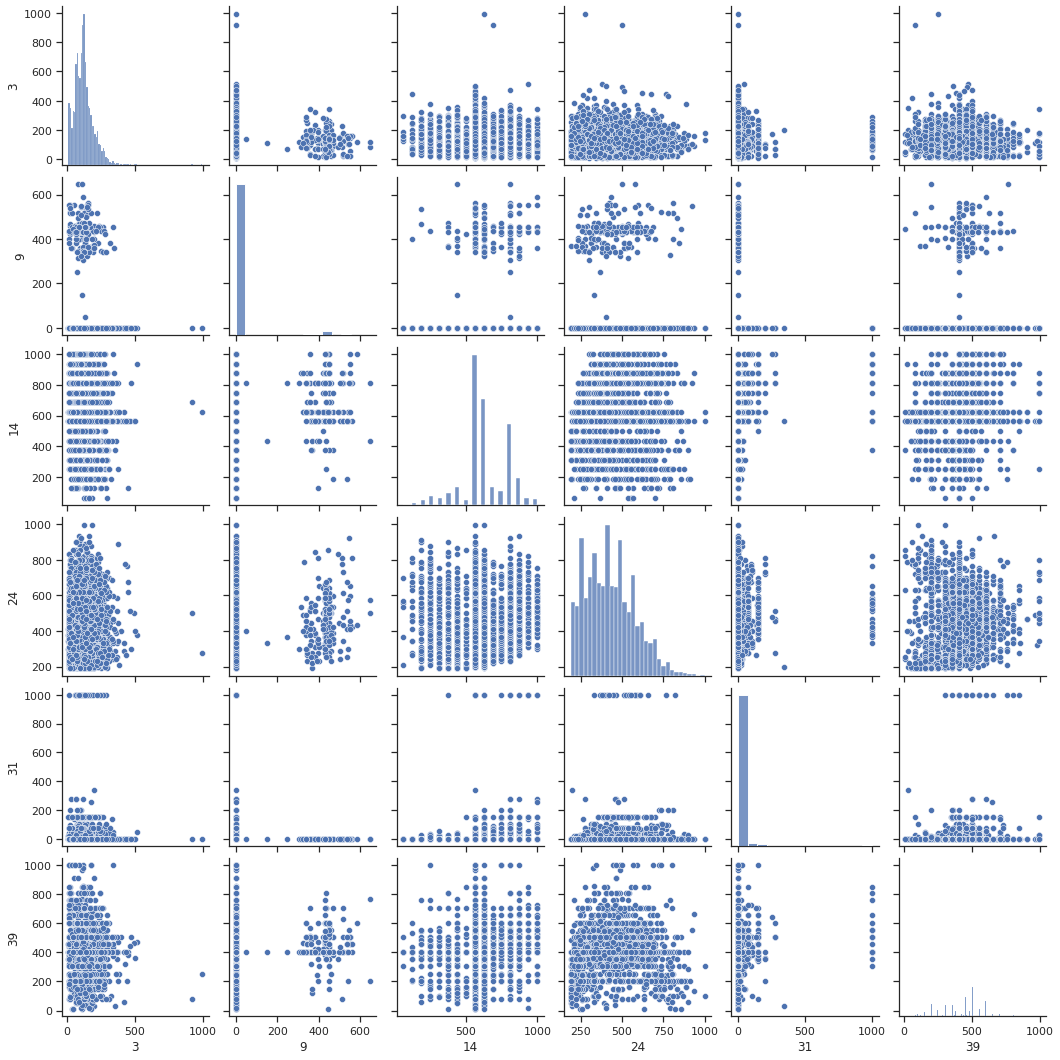

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(ada_train[[3, 9, 14, 24, 31, 39]])

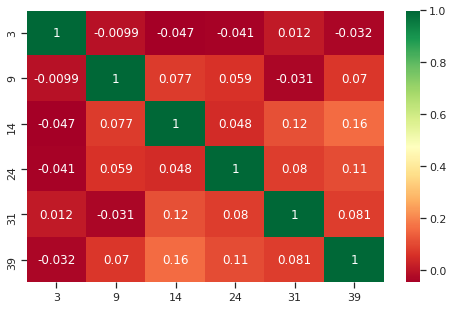

In [ ]:
plt.subplots(figsize=(8, 5))
sns.heatmap(ada_train[[3, 9, 14, 24, 31, 39]].corr(), annot=True, cmap="RdYlGn")
plt.show()

In [ ]:
#ada_train.corr()

# 2. Data engineering #

## Training set

Let's drop the features that contain only 0s.

In [ ]:
data_train=data_train.drop(13, axis=1)
data_train=data_train.drop(20, axis=1)

Dealing with outliers: 
1. in columns [3 14 24 39] we have too many values that qualify as outlier. So we will let them be
2. in columns 9 and 31 we have 90% of values equal to 0 and the rest go up to 1000. We don't see a correlation with class value. So we drop these columns completely.

In [ ]:
data_train=data_train.drop(9, axis=1)
data_train=data_train.drop(31, axis=1)

Normalizing the 4 remaining features that have values between 0 and 1000

In [ ]:
from sklearn.preprocessing import StandardScaler

data_train_scaled = data_train.copy()
col_names = [3, 14, 24, 39]
features = data_train_scaled[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
data_train_scaled[col_names] = features
data_train_scaled.head(3)

,0,1,2,3,4,5,6,7,8,10,11,12,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,0.0,1.0,1.0,-1.353604,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.116009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.885876,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.065043,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.094515,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.207546,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.646086,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.415206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,-0.249593,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.116009,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.175679,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.065043,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn import preprocessing
data_train_normal = data_train.copy()
col_names = [3, 14, 24, 39]
features = data_train_normal[col_names]
features = preprocessing.normalize(features)
data_train_normal[col_names] = features
data_train_normal.head(3)

,0,1,2,3,4,5,6,7,8,10,11,12,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,0.0,1.0,1.0,0.033479,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.849536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.313868,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.422676,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.241641,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.793964,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.343385,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.439678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.106808,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.795671,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.445850,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.395876,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Validation set

In [ ]:
data_valid.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
count,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.0,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.0,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.0,415.000000
mean,0.002410,0.024096,0.091566,123.785542,0.074699,0.040964,0.149398,0.860241,0.132530,28.850602,0.038554,0.014458,0.154217,0.0,631.139759,0.686747,0.043373,0.045783,0.754217,0.019277,0.0,0.125301,0.050602,0.103614,423.768675,0.038554,0.327711,0.069880,0.028916,0.091566,0.455422,9.250602,0.074699,0.081928,0.043373,0.040964,0.009639,0.004819,0.007229,407.860241,0.255422,0.106024,0.002410,0.501205,0.072289,0.110843,0.0,0.026506
std,0.049088,0.153534,0.288761,66.437721,0.263222,0.198446,0.356910,0.347155,0.339475,109.179734,0.192762,0.119512,0.361592,0.0,149.152938,0.464376,0.203942,0.209267,0.431070,0.137663,0.0,0.331460,0.219449,0.305128,145.582171,0.192762,0.469945,0.255252,0.167772,0.288761,0.498610,72.257957,0.263222,0.274586,0.203942,0.198446,0.097820,0.069337,0.084817,128.931487,0.436624,0.308240,0.049088,0.500602,0.259279,0.314317,0.0,0.160828
min,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,125.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,78.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,562.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,316.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,404.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,119.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,624.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,411.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,404.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
75%,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,749.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,522.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,454.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,1.000000,610.000000,1.000000,1.000000,1.000000,1.000000,1.000000,597.000000,1.000000,1.000000,1.000000,0.0,999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,899.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [ ]:
#dropping the varibles with 0 values
data_valid=data_valid.drop(13, axis=1)
data_valid=data_valid.drop(20, axis=1)

#data_valid=data_valid.drop(46, axis=1) 

In [ ]:
#dropping the varibles with 0 values 
data_valid=data_valid.drop(9, axis=1)
data_valid=data_valid.drop(31, axis=1)

In [ ]:
data_valid_normal = data_valid.copy()
col_names = [3, 14, 24, 39]
features = data_valid_normal[col_names]
features = preprocessing.normalize(features)
data_valid_normal[col_names] = features
data_valid_normal.head(3)

,0,1,2,3,4,5,6,7,8,10,11,12,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,0.0,0.0,0.0,0.087393,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.654865,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.466096,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.588446,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.025997,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.664096,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.655824,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.358044,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.091403,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.719694,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.548417,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.415842,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# 3.Models building

### Find best k for kNN

In [ ]:
from sklearn.neighbors import NearestNeighbors

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-

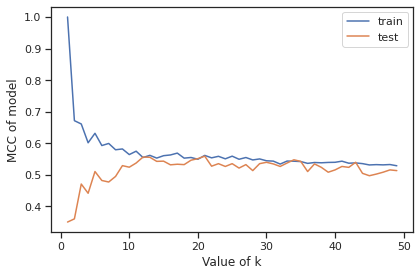

In [ ]:
N = 50
train_mcc = []
test_mcc = []
for k in range(1,N):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(data_train_normal.values,labels_train)
    y_hat = neigh.predict(data_valid_normal)
    train_mcc.append(metrics.matthews_corrcoef(labels_train, neigh.predict(data_train_normal.values)))
    test_mcc.append(metrics.matthews_corrcoef(labels_valid, y_hat))

plt.plot(range(1,N), train_mcc, label='train')
plt.plot(range(1,N), test_mcc, label='test')
plt.legend(loc='best')
plt.xlabel('Value of k')
plt.ylabel('MCC of model')
plt.tight_layout()
plt.show()

In [ ]:
Ks = 30
mean_mcc = np.zeros((Ks-1, 4))
std_mcc = np.zeros((Ks-1, 4))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    auto_model = KNeighborsClassifier(n_neighbors = n).fit(data_train_normal.values,labels_train.values)
    ball_model = KNeighborsClassifier(n_neighbors = n, algorithm='ball_tree').fit(data_train_normal.values,labels_train.values)
    kd_model = KNeighborsClassifier(n_neighbors = n, algorithm='kd_tree').fit(data_train_normal.values,labels_train.values)
    brute_model = KNeighborsClassifier(n_neighbors = n, algorithm='brute').fit(data_train_normal.values,labels_train.values)
    yhat=auto_model.predict(data_valid_normal.values)
    mean_mcc[n-1, 0] = metrics.matthews_corrcoef(labels_valid.values, yhat)
    std_mcc[n-1, 0]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    yhat=ball_model.predict(data_valid_normal.values)
    mean_mcc[n-1, 1] = metrics.matthews_corrcoef(labels_valid.values, yhat)
    std_mcc[n-1, 1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    yhat=kd_model.predict(data_valid_normal.values)
    mean_mcc[n-1, 2] = metrics.matthews_corrcoef(labels_valid.values, yhat)
    std_mcc[n-1, 2]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    yhat=brute_model.predict(data_valid_normal.values)
    mean_mcc[n-1, 3] = metrics.matthews_corrcoef(labels_valid.values, yhat)
    std_mcc[n-1, 3]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_mcc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by Intera

array([[0.3500796 , 0.3500796 , 0.3500796 , 0.3500796 ],
       [0.36013592, 0.36013592, 0.36013592, 0.36013592],
       [0.47053149, 0.47053149, 0.47053149, 0.47053149],
       [0.44134078, 0.44134078, 0.44134078, 0.44134078],
       [0.51014287, 0.51014287, 0.51014287, 0.51014287],
       [0.4817647 , 0.4817647 , 0.4817647 , 0.4817647 ],
       [0.47695368, 0.47695368, 0.47695368, 0.47695368],
       [0.49462937, 0.49462937, 0.49462937, 0.49462937],
       [0.52883358, 0.52883358, 0.52883358, 0.52883358],
       [0.52392169, 0.52392169, 0.52392169, 0.52392169],
       [0.53714418, 0.53714418, 0.53714418, 0.53714418],
       [0.55601539, 0.55601539, 0.55601539, 0.55601539],
       [0.55533236, 0.55533236, 0.55533236, 0.55533236],
       [0.54242449, 0.54242449, 0.54242449, 0.54242449],
       [0.54305493, 0.54305493, 0.54305493, 0.54305493],
       [0.53144807, 0.53144807, 0.53144807, 0.53144807],
       [0.53329588, 0.53329588, 0.53329588, 0.53329588],
       [0.53210246, 0.53210246,

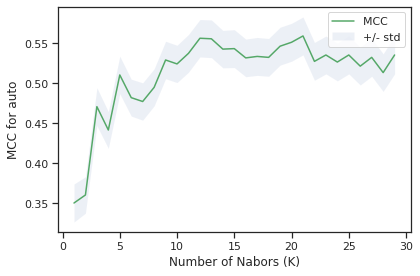

In [ ]:
plt.plot(range(1,Ks),mean_mcc[:, 0],'g')
plt.fill_between(range(1,Ks),mean_mcc[:, 0] - 1 * std_mcc[:, 0],mean_mcc[:, 0] + 1 * std_mcc[:, 0], alpha=0.10)
plt.legend(('MCC ', '+/- std'))
plt.ylabel('MCC for auto')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best mcc for auto model was", mean_mcc[:,0].max(), "with k=", mean_mcc[:,0].argmax()+1) 

The best mcc for auto model was 0.5588787908420112 with k= 21


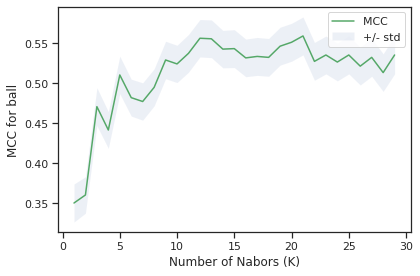

In [ ]:
plt.plot(range(1,Ks),mean_mcc[:, 1],'g')
plt.fill_between(range(1,Ks),mean_mcc[:, 1] - 1 * std_mcc[:, 1],mean_mcc[:, 1] + 1 * std_mcc[:, 1], alpha=0.10)
plt.legend(('MCC ', '+/- std'))
plt.ylabel('MCC for ball')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best mcc for auto ball was", mean_mcc[:,1].max(), "with k=", mean_mcc[:,1].argmax()+1) 

The best mcc for auto ball was 0.5588787908420112 with k= 21


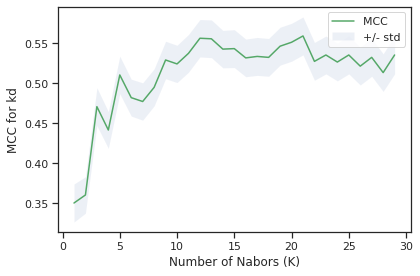

In [ ]:
plt.plot(range(1,Ks),mean_mcc[:, 2],'g')
plt.fill_between(range(1,Ks),mean_mcc[:, 2] - 1 * std_mcc[:, 2],mean_mcc[:, 2] + 1 * std_mcc[:, 2], alpha=0.10)
plt.legend(('MCC ', '+/- std'))
plt.ylabel('MCC for kd')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best mcc for auto kd was", mean_mcc[:,2].max(), "with k=", mean_mcc[:,2].argmax()+1) 

The best mcc for auto kd was 0.5588787908420112 with k= 21


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


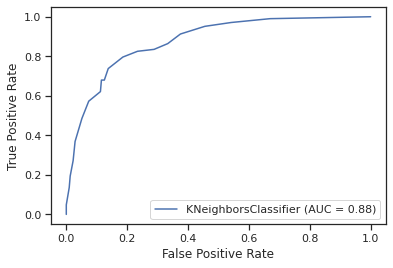

In [ ]:
neigh = KNeighborsClassifier(n_neighbors = 21).fit(data_train_normal.values,labels_train.values)
metrics.plot_roc_curve(neigh, data_valid_normal.values, labels_valid.values)
plt.show()

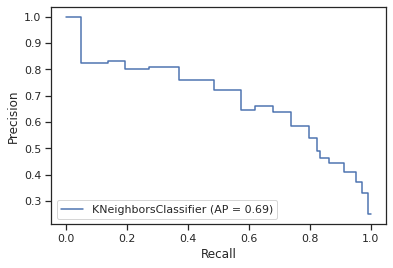

In [ ]:
metrics.plot_precision_recall_curve(neigh, data_valid_normal.values, labels_valid.values)
plt.show()

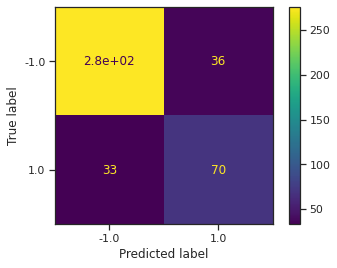

In [ ]:
metrics.plot_confusion_matrix(neigh, data_valid_normal.values, labels_valid.values)
plt.show()

In [ ]:
yhat=neigh.predict(data_valid_normal.values)
fpr, tpr, thresholds = metrics.roc_curve(labels_valid.values, yhat)
metrics.auc(fpr, tpr)

0.7821135175504108

In [ ]:
metrics.balanced_accuracy_score(labels_valid.values, yhat)

0.7821135175504108

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(neigh, data_valid_normal.values, yhat, n_repeats=10, random_state=0)
result

{'importances': array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.00240964, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.01445783, 0.01445783, 0.01445783, 0.00722892, 0.01445783,
         0.01686747, 0.01204819, 0.01445783, 0.01204819, 0.00963855],
        [0.01686747, 0.01204819, 0.01445783, 0.01445783, 0.01927711,
         0.01204819, 0.01204819, 0.01445783, 0.02650602, 0.01686747],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.00240964, 0.00240964, 0.        , 0.        , 0.00240964,
         0.00240964, 0.00240964, 0.        , 0.00240964, 0.00240964],
        [0.0

In [ ]:
indices = np.argsort(result.importances_mean)[::-1]
indices

array([41, 11, 21, 12,  8, 18, 35, 29, 14, 16, 37,  3,  2, 30, 15, 27, 24,
       22, 39, 19, 31, 13, 28, 36,  9,  6,  7, 40, 20, 10,  1,  5,  4, 43,
       17, 42, 23, 25, 26, 32, 33, 34, 38,  0])

In [ ]:
result.importances_mean[indices]

array([0.04987952, 0.04192771, 0.04144578, 0.03542169, 0.0339759 ,
       0.02578313, 0.02120482, 0.02048193, 0.01759036, 0.01686747,
       0.01590361, 0.01590361, 0.01301205, 0.01060241, 0.01012048,
       0.00771084, 0.00771084, 0.00771084, 0.00674699, 0.00626506,
       0.0053012 , 0.0053012 , 0.0053012 , 0.00457831, 0.0026506 ,
       0.00168675, 0.00144578, 0.00144578, 0.00096386, 0.00048193,
       0.00024096, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [ ]:
result.importances_std[indices]

array([0.0071522 , 0.00648367, 0.0068833 , 0.00628819, 0.00521841,
       0.00628819, 0.00479512, 0.0044757 , 0.00389289, 0.00388543,
       0.00268326, 0.00420135, 0.00268326, 0.00159837, 0.00144578,
       0.00300964, 0.00096386, 0.00144578, 0.0028101 , 0.00159837,
       0.00180321, 0.00144578, 0.00180321, 0.00168675, 0.00072289,
       0.00110424, 0.00220847, 0.00159837, 0.00118048, 0.00096386,
       0.00072289, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

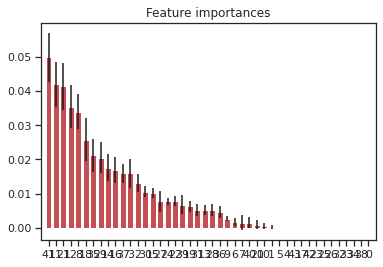

In [ ]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(data_valid_normal.shape[1]), result.importances_mean[indices],
        color="r", yerr=result.importances_std[indices], align="center")
plt.xticks(range(data_valid_normal.shape[1]), indices)
plt.xlim([-1, data_valid_normal.shape[1]])
plt.show()

In [ ]:
#Not finished yet - Gabriel

print( "Features that does not have importance for the model", [i for i n result.importances_mean[indices]]) 

## 3.0 Feature Selection ##

RFE for selecting the best features on which to train our models

In [ ]:
import time
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE

k_neigh = 14

X = data_train_normal.copy()
y = labels_train.copy()

# get a list of LogisticRegression models to evaluate
def get_lr_models():
	models = dict()
	for i in range(20, 30):
		rfe = RFE(estimator=(LogisticRegression()), n_features_to_select=i)
		model = LogisticRegression()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

# get a list of kNN models to evaluate
def get_knn_models():
	models = dict()
	for i in range(20, 30):
		rfe = RFE(estimator=KNeighborsClassifier(n_neighbors = k_neigh), n_features_to_select=i)
		model = KNeighborsClassifier(n_neighbors = k_neigh)
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

# get a list of LDA models to evaluate
def get_lda_models():
	models = dict()
	for i in range(20, 30):
		rfe = RFE(estimator=LinearDiscriminantAnalysis(), n_features_to_select=i)
		model = LinearDiscriminantAnalysis()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

# get a list of Decision Tree models to evaluate
def get_tree_models():
	models = dict()
	for i in range(20, 30):
		#we haven't found the optimum alpha yet. It's in the code below, in the Decision Tree section
		#rfe = RFE(estimator=DecisionTreeClassifier(ccp_alpha = optimum_alpha), n_features_to_select=i)
		#model = DecisionTreeClassifier(ccp_alpha = optimum_alpha)
		
		rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
		model = DecisionTreeClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='balanced_accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

def evaluate_all_models(models, title):
  start = time.time()

  # evaluate the models and store results
  results, names = list(), list()
  for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
  # plot model performance for comparison
  plt.boxplot(results, labels=names, showmeans=True)
  plt.title(title)
  plt.ylim((0.5,1))
  plt.show()

  stop = time.time()

  print(f'Total time (seconds): {stop-start}')

>20 0.822 (0.016)
>21 0.822 (0.016)
>22 0.822 (0.016)
>23 0.822 (0.017)
>24 0.822 (0.017)
>25 0.822 (0.016)
>26 0.822 (0.017)
>27 0.823 (0.017)
>28 0.824 (0.017)
>29 0.824 (0.017)


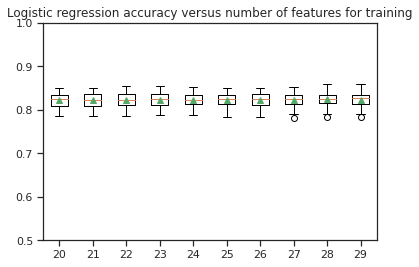

Total time (seconds): 273.41399669647217


In [ ]:
evaluate_all_models(get_lr_models(), 'Logistic regression accuracy versus number of features for training')

In [ ]:
evaluate_all_models(get_lda_models(), 'LDA accuracy versus number of features for training')

>20 0.823 (0.017)


In [ ]:
evaluate_all_models(get_tree_models(), 'Decistion Tree accuracy versus number of features for training')

For kNN we cannot do the same operations as above. It needs a tweak because 'The classifier does not expose "coef_" or "feature_importances_" attributes'

##3.1 Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

def Average(lst): 
    return sum(lst) / len(lst) 

In [ ]:
acc_list = []
mcc_list = []
for i in range(1, len(ada_train.columns.values) + 1):
  acc_l = []
  mcc_l = []
  for j in range(10):
    X_train, X_val, Y_train, Y_val = train_test_split(X[:,:i], y, test_size=0.2, random_state=12)
    #building the model
    model = GaussianNB()
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_val)
    acc_l.append(metrics.accuracy_score(Y_val, y_pred))
    mcc_l.append(metrics.matthews_corrcoef(Y_val, y_pred))
  acc_l.remove(max(acc_l))
  acc_l.remove(min(acc_l))
  acc = Average(acc_l)
  acc_list.append(acc)
  mcc_l.remove(max(mcc_l))
  mcc_l.remove(min(mcc_l))
  mcc = Average(mcc_l)
  mcc_list.append(mcc)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

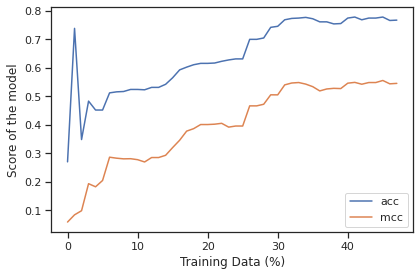

In [ ]:
plt.plot(ada_train.columns.values, acc_list, label='acc')
plt.plot(ada_train.columns.values, mcc_list, label='mcc')
plt.legend(loc='best')
plt.xlabel('Training Data (%)')
plt.ylabel('Score of the model')
plt.tight_layout()
plt.show()

In [ ]:
max(acc_list)

0.7783132530120483

In [ ]:
max(mcc_list)

0.555579181190682

In [ ]:
ada_y_valid = pd.DataFrame(pd.read_table("ADA/ada_valid.labels", sep=" ", ).values)
ada_y_valid.head()

,0
0,-1
1,1
2,-1
3,-1
4,-1


In [ ]:
ada_valid = pd.DataFrame(pd.read_table("ADA/ada_valid.data", sep=" ", ).values)
ada_valid.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,562.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,555.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,303.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,111.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,874.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,666.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,505.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN
2,0.0,0.0,0.0,217.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,250.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,455.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,1.0,83.0,0.0,0.0,1.0,1.0,0.0,365.0,0.0,0.0,0.0,0.0,624.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,278.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,79.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,749.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,533.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,444.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
ada_valid = ada_valid.drop(48, axis=1)

In [ ]:
X_valid = preprocessing.normalize(ada_valid)
X_valid[:1]

array([[0.        , 0.        , 0.        , 0.02599652, 0.        ,
        0.        , 0.        , 0.00118166, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.66409293,
        0.00118166, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.65582131,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00118166, 0.        , 0.        , 0.        , 0.00118166,
        0.        , 0.        , 0.        , 0.        , 0.35804299,
        0.        , 0.        , 0.        , 0.00118166, 0.00118166,
        0.        , 0.        , 0.        ]])

In [ ]:
X = preprocessing.normalize(ada_train)
X[:1]

array([[0.        , 0.        , 0.00181684, 0.24163932, 0.        ,
        0.        , 0.00181684, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.79395775,
        0.        , 0.        , 0.        , 0.00181684, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.34338218,
        0.        , 0.00181684, 0.        , 0.00181684, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.43967454,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

In [ ]:
y = ada_train_labels.values
y[:5]

array([[-1],
       [-1],
       [ 1],
       [-1],
       [ 1]])

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

NB_model = GaussianNB()

#Train the model using the training sets
NB_model.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#checking the accuracy score for validation dataset
y_pred = NB_model.predict(X_valid)

accuracy_score(y_pred,ada_y_valid.values)

0.7439613526570048

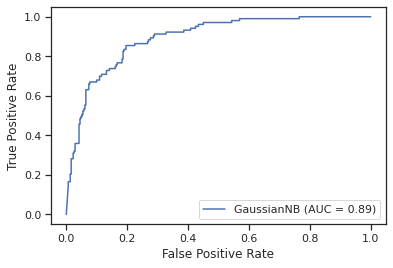

In [ ]:
metrics.plot_roc_curve(NB_model, X_valid, ada_y_valid.values)
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[214  97]
 [  9  94]]


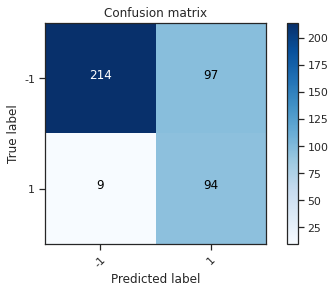

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(ada_y_valid.values, y_pred, labels=[-1,1])
#np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['-1','1'],normalize= False,  title='Confusion matrix')

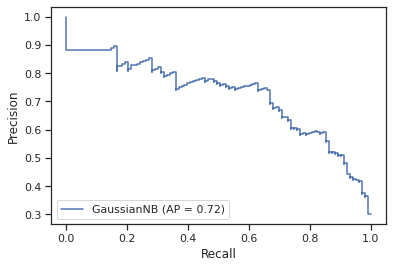

In [ ]:
metrics.plot_precision_recall_curve(NB_model, X_valid, ada_y_valid.values)
plt.show()

## 3.2 Decision Trees ##

### 3.2.1. Explore results with default parameters ###

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(data_train_normal, labels_train, test_size=0.3, random_state=101)
dtree = DecisionTreeClassifier()

print(dtree.fit(X_train, y_train))

train_accuracy = dtree.score(X_train, y_train)

predictions = dtree.predict(X_test)
print('Training accuracy:', train_accuracy)

print('\nTesting')
print('Confusion matrix:\n', confusion_matrix(y_test,predictions))
print('\n')
report = classification_report(y_test,predictions)
print(classification_report(y_test,predictions))

## 3.2.2. Finding the optimum depth ##

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold

def max_depth_swipe(global_max_depth = 15, folds = 5):
  '''
  retain the accuracy for test and train in a 3D array
  lines:
    0 - train
    1 - test
  columns:
    iteration through kfolds (the number of folds is set in the variable above)
  depth of array:
    from min to max depth of our Trees  
  '''
  accuracy = np.zeros((2, folds, global_max_depth), dtype=float)

  #we are only interested in depth 3 -> 14 (incl.)
  for d in range(3,15):
    # create the tree model and set max depth
    kfoldtree = DecisionTreeClassifier(max_depth=d)

    cv = KFold(folds, random_state=1, shuffle=True)

    '''
    for scoring, we select 'accuracy'
    there are many other options for the scoring parameter, detailed here: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    '''
    cv_results = cross_validate(kfoldtree, data_train_normal, labels_train, scoring='accuracy', cv=cv, return_train_score=True)

    '''
    cv_results contains: fit_time, score_time, test_score and train_score. 
    we are only interested in the last two
    '''
    accuracy[0,:,d] = cv_results['train_score']
    accuracy[1,:,d] = cv_results['test_score']

  accuracy_mean = np.mean(accuracy, axis=1)
  accuracy_std = np.std(accuracy, axis=1)

  fig = plt.figure(figsize=(10,8))
  x = np.arange(global_max_depth)
  plt.errorbar(x[3:], accuracy_mean[0,3:], accuracy_std[0,3:], marker='^', capsize=5, label='train')
  plt.errorbar(x[3:], accuracy_mean[1,3:], accuracy_std[1,3:], marker='x', capsize=5, label='test')
  plt.legend(fontsize=14)

  plt.xlabel('Maximum depth param for the decision tree tree', fontsize=14)
  plt.xlim([2.5,15])

  plt.ylabel(f'Mean accuracy ({folds}-fold cross validation)', fontsize=14)
  plt.ylim([np.min(accuracy_mean[:,3:])-0.1,1])

  plt.title(f'Mean accuracy versus max tree depth ({folds}-fold cross-validation)', fontsize=18)

  plt.show()

In [ ]:
#Train decision trees with max_depth up to 15, using 10-fold cross-validation
max_depth_swipe(15,10)

**The optimal tree depth is between 3 and 5.**

In [ ]:
optimum_depth = 5

## 3.2.3. Finding the optimum min_samples_split ##

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

folds = 10
min_samples_splits = np.linspace(0.001, 1, 100, endpoint=True)

'''
retain the accuracy for test and train in a 3D array
lines:
  0 - train
  1 - test
columns:
  iteration through kfolds (the number of folds is set in the variable above)
depth of array:
  from min to max depth of our Trees  
'''
accuracy = np.zeros((2, folds, min_samples_splits.shape[0]), dtype=float)

i=0
#we are only interested in depth 3 -> 14 (incl.)
for min_samples_split in min_samples_splits:
  # create the tree model and set max depth
  kfoldtree = DecisionTreeClassifier(min_samples_split=min_samples_split, max_depth=5)

  cv = KFold(folds, random_state=1, shuffle=True)

  cv_results = cross_validate(kfoldtree, data_train_normal, labels_train, scoring='accuracy', cv=cv, return_train_score=True)

  '''
  cv_results contains: fit_time, score_time, test_score and train_score. 
  we are only interested in the last two
  '''
  accuracy[0,:,i] = cv_results['train_score']
  accuracy[1,:,i] = cv_results['test_score']
  i+=1

accuracy_mean = np.mean(accuracy, axis=1)
accuracy_std = np.std(accuracy, axis=1)


fig = plt.figure(figsize=(10,8))

plt.plot(min_samples_splits, accuracy_mean[0,:], '-', label='train')
plt.fill_between(min_samples_splits, accuracy_mean[0,:]-accuracy_std[0,:], accuracy_mean[0,:]+accuracy_std[0,:], alpha = 0.2)

plt.plot(min_samples_splits, accuracy_mean[1,:], '-',  label='test')
plt.fill_between(min_samples_splits, accuracy_mean[1,:]-accuracy_std[1,:], accuracy_mean[1,:]+accuracy_std[1,:], alpha = 0.2)

plt.legend(fontsize=14)

plt.xlabel('Min samples split', fontsize=14)

plt.ylabel(f'Mean accuracy ({folds}-fold cross validation)', fontsize=14)
plt.ylim([0.7,1])

plt.title(f'Mean accuracy versus min sample split ({folds}-fold cross-validation)', fontsize=18)

plt.show()

## 3.2.4. Optimum min samples leaf ##

In [ ]:
folds = 5
min_samples_leaves = np.linspace(0.001, 0.5, 100, endpoint=True)

'''
retain the accuracy for test and train in a 3D array
lines:
  0 - train
  1 - test
columns:
  iteration through kfolds (the number of folds is set in the variable above)
depth of array:
  from min to max depth of our Trees  
'''
accuracy = np.zeros((2, folds, min_samples_splits.shape[0]), dtype=float)

i=0
#we are only interested in depth 3 -> 14 (incl.)
for min_samples_leaf in min_samples_leaves:
  # create the tree model and set max depth
  kfoldtree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, max_depth=4)

  cv = KFold(folds, random_state=1, shuffle=True)

  cv_results = cross_validate(kfoldtree, data_train_normal, labels_train, scoring='accuracy', cv=cv, return_train_score=True)

  '''
  cv_results contains: fit_time, score_time, test_score and train_score. 
  we are only interested in the last two
  '''
  accuracy[0,:,i] = cv_results['train_score']
  accuracy[1,:,i] = cv_results['test_score']
  i+=1

accuracy_mean = np.mean(accuracy, axis=1)
accuracy_std = np.std(accuracy, axis=1)


fig = plt.figure(figsize=(10,8))

plt.plot(min_samples_splits, accuracy_mean[0,:], '-', label='train')
plt.fill_between(min_samples_splits, accuracy_mean[0,:]-accuracy_std[0,:], accuracy_mean[0,:]+accuracy_std[0,:], alpha = 0.2)

plt.plot(min_samples_splits, accuracy_mean[1,:], '-',  label='test')
plt.fill_between(min_samples_splits, accuracy_mean[1,:]-accuracy_std[1,:], accuracy_mean[1,:]+accuracy_std[1,:], alpha = 0.2)

plt.legend(fontsize=14)

plt.xlabel('Min samples leaf', fontsize=14)

plt.ylabel(f'Mean accuracy ({folds}-fold cross validation)', fontsize=14)
plt.ylim([0.5,0.9])

plt.title(f'Mean accuracy versus min sample leaf ({folds}-fold cross-validation)', fontsize=18)

plt.show()

## 3.2.5. Post-pruning with cost complexity ##

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_train_normal, labels_train, random_state=0)

#get alpha values (ccp_alphas)
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#build trees for each alpha values
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)

#get rid of the tree with one node only
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

#The effect of alpha on accuracy in train and test sets
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig = plt.figure(figsize=(12,8))
plt.xlabel("alpha", fontsize=14)
plt.ylabel("accuracy", fontsize=14)
plt.title("Accuracy versus alpha for training and testing sets", fontsize=18)
plt.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
plt.legend()
plt.show()

In [ ]:
ccp_alphas[ccp_alphas>0.003]

In [ ]:
optimum_alpha = 0.00479408

## 3.2.6. Build the final (optimal) tree

In [ ]:
#without feature selection

X_train, X_test, y_train, y_test = train_test_split(data_train_normal, labels_train, test_size=0.3, random_state=101)
#dtree = DecisionTreeClassifier(max_depth = optimum_depth, ccp_alpha = optimum_alpha)
dtree = DecisionTreeClassifier(ccp_alpha = optimum_alpha)

print(dtree.fit(X_train, y_train))

train_accuracy = dtree.score(X_train, y_train)

predictions = dtree.predict(X_test)
print('Training accuracy:', train_accuracy)

print('\nTesting')
print('Confusion matrix:\n', confusion_matrix(y_test,predictions))
print('\n')
report = classification_report(y_test,predictions)
print(classification_report(y_test,predictions))

In [ ]:
#RFE with default n_features_to_select (half of total features) and cross-validation

X = data_train_normal
y = labels_train

# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(ccp_alpha = optimum_alpha))
model = DecisionTreeClassifier(ccp_alpha = optimum_alpha)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
#Final tree
rfe_tree = RFE(estimator=DecisionTreeClassifier(ccp_alpha = optimum_alpha))
rfe_tree.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe_tree.support_[i], rfe_tree.ranking_[i]))

#let's store the selected features for later 
tree_selected_features = rfe_tree.support_

Let's visualize which are the selected features for Desicion Tree classification

yellow -> selected

In [ ]:
ax = plt.axes()
#sns.heatmap(rfe_tree.support_.reshape(1,-1),annot=True,yticklabels=False,cbar=False,cmap='viridis') #annotation looks really bad
sns.heatmap(rfe_tree.support_.reshape(1,-1),yticklabels=False,cbar=False,cmap='viridis')
ax.set_title('Features selected for Decision Tree')
plt.show()